# Model for Startups

In [1]:
#importing the requried libs

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#Startups problem
#reading the datasets
startups_df=pd.read_csv('50_Startups.csv')
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#finding data types of variables and null values
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

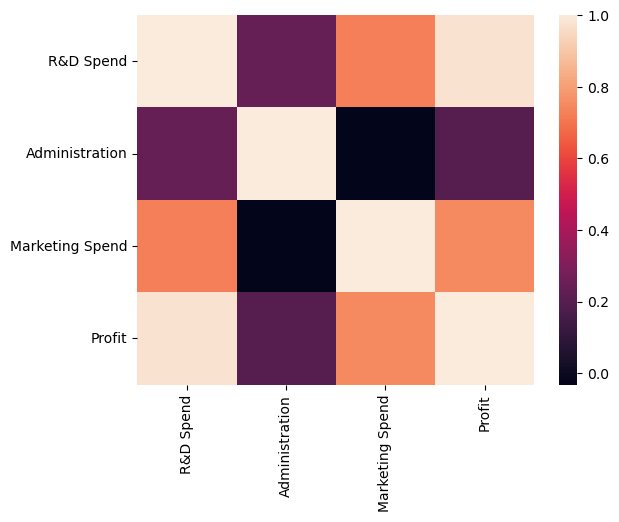

In [4]:
#checking the co relation of all the variables present in datasets
sns.heatmap(startups_df.corr())#visualizing using heatmap feel great 

In [5]:
#checking the values of correlation
startups_df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
#Standardizing the data using Standard Scaler

scaler=StandardScaler()

#applying scaler for the data to fine tune

standard=scaler.fit_transform(startups_df.iloc[:,0:3])

#spliting the data as independent and dependent variable

x=standard
y=startups_df.iloc[:,-1]

#Spliting the data as Train and Test

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [7]:
#creating the linear reg model

model=LinearRegression()

#inserting both x and y train to train the model

model.fit(X_train,y_train)

LinearRegression()

In [8]:
#Doing prediction using model which was created by training the data

ypred=model.predict(X_test)
ypred

array([104054.44293869, 132719.3459701 , 133640.26830949,  72294.76911458,
       179685.62227843, 114508.97572031,  66305.23069863,  98297.69326565,
       114277.91894933, 169112.36095691,  96257.40152149,  87916.97242208,
       110687.33942598,  90670.8337806 , 127780.63539583])

In [9]:
#importing the r2 score to find accuracy
from sklearn.metrics import r2_score

# finding Test accuracy by using r2 score
print('Test Accuracy',r2_score(y_test,ypred))

#predicting the model for traing data
ypred_train=model.predict(X_train)

#finding the Training accuracy of the model
print('Training Accuracy',r2_score(y_train,ypred_train))

Test Accuracy 0.9355188337118218
Training Accuracy 0.9515391457049143


In [10]:
#creating new dataframe to show the prediction v/s actual v/s Difference b/w them
new_df=pd.DataFrame({'y-predict':ypred,'y-actual':y_test,'Difference':y_test-ypred})
new_df

,y-predict,y-actual,Difference
28,104054.442939,103282.38,-772.062939
11,132719.345970,144259.40,11540.054030
10,133640.268309,146121.95,12481.681691
41,72294.769115,77798.83,5504.060885
2,179685.622278,191050.39,11364.767722
27,114508.975720,105008.31,-9500.665720
38,66305.230699,81229.06,14923.829301
31,98297.693266,97483.56,-814.133266
22,114277.918949,110352.25,-3925.668949
4,169112.360957,166187.94,-2924.420957


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


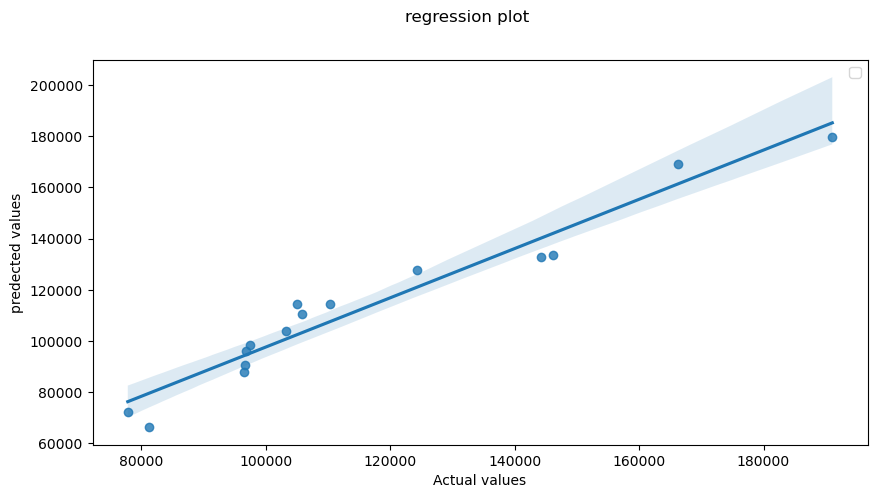

In [11]:
#ploting the regression plot for only tested or predicted data over created model
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')#ignoreing the error


plt.figure(figsize=(10,5))
sns.regplot(y_test,ypred)
plt.xlabel('Actual values')
plt.ylabel('predected values')
plt.suptitle('regression plot')
plt.legend()



In [12]:
#using the model i am predicting the overall independent variables present in the datasets

overallpred=model.predict(x)
p=pd.Series(overallpred)
p.head()

0    192214.729083
1    189615.912205
2    179685.622278
3    172286.723148
4    169112.360957
dtype: float64

In [13]:
#difference b/w actual and predictions

new_df=pd.DataFrame({'y-predict':p,'y-actual':y,'Difference':y-p})
new_df.head()

,y-predict,y-actual,Difference
0,192214.729083,192261.83,47.100917
1,189615.912205,191792.06,2176.147795
2,179685.622278,191050.39,11364.767722
3,172286.723148,182901.99,10615.266852
4,169112.360957,166187.94,-2924.420957


In [14]:
#here i am creating new column as predicted values to compare with actual ones
startups_df['Predicted values']=np.round(p,3)
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Predicted values
0,165349.20,136897.80,471784.10,New York,192261.83,192214.729
1,162597.70,151377.59,443898.53,California,191792.06,189615.912
2,153441.51,101145.55,407934.54,Florida,191050.39,179685.622
3,144372.41,118671.85,383199.62,New York,182901.99,172286.723
4,142107.34,91391.77,366168.42,Florida,166187.94,169112.361


<AxesSubplot:xlabel='Profit'>

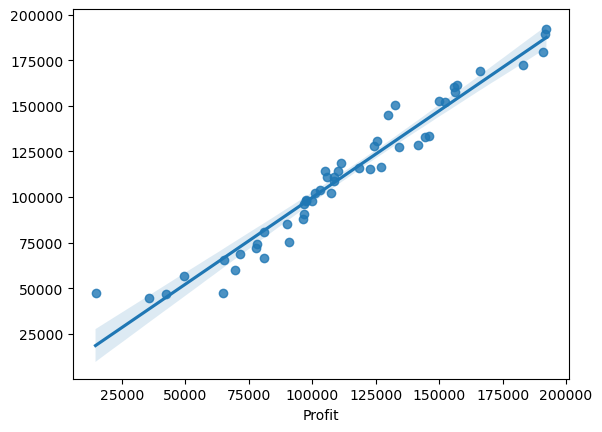

In [15]:
#lets plot the overall predictio
sns.regplot(y,p)

# Toyota corolla model


In [16]:
#extracting or reading data 
carprice_df=pd.read_csv('ToyotaCorolla.csv')
carprice_df.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170


In [17]:
#finding the correlation of the model
carprice_df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,-0.130207,NaN,-0.043343,-0.240821,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,NaN,0.063104,0.219197,0.581198
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,NaN,-0.013063,0.031373,-0.002167
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,NaN,0.007766,0.193934,0.473478
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,0.011326,0.057929
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,0.057249
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,0.335637


In [18]:
# finding data types and null values
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1436 non-null   int64 
 1   Price          1436 non-null   int64 
 2   Age_08_04      1436 non-null   int64 
 3   Mfg_Month      1436 non-null   int64 
 4   Mfg_Year       1436 non-null   int64 
 5   KM             1436 non-null   int64 
 6   Fuel_Type      1436 non-null   object
 7   HP             1436 non-null   int64 
 8   Met_Color      1436 non-null   int64 
 9   Color          1436 non-null   object
 10  Automatic      1436 non-null   int64 
 11  cc             1436 non-null   int64 
 12  Doors          1436 non-null   int64 
 13  Cylinders      1436 non-null   int64 
 14  Gears          1436 non-null   int64 
 15  Quarterly_Tax  1436 non-null   int64 
 16  Weight         1436 non-null   int64 
dtypes: int64(15), object(2)
memory usage: 190.8+ KB


In [19]:
#spliting the data 
y=carprice_df.iloc[:,1]#dependent variable

#Indipendent variable
x=carprice_df.iloc[:,[2,5,7,11,12,14,15,16]]#here i am only using required feauters
z=x

In [20]:
# selected independent variables or features
x.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [21]:
#dependent variable

y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [22]:
#now again finding the correlation of selected features
x.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

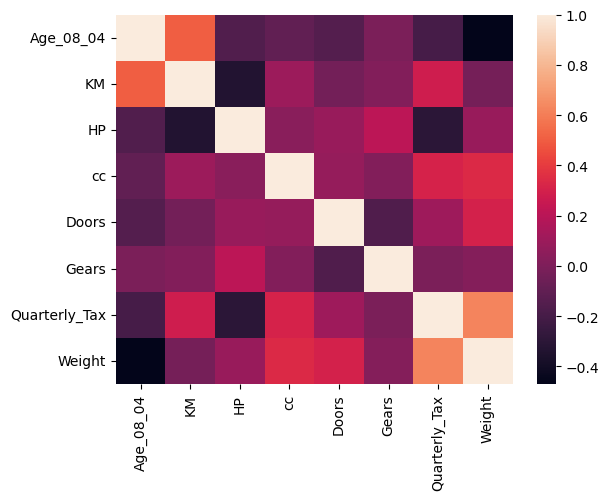

In [23]:
#visualizing the correlation using seaborn heatmap
sns.heatmap(x.corr())

In [24]:
#Sclaing the data using Standardscaler
x=StandardScaler().fit_transform(x)


In [25]:
#spliting the data as train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
#creating the model using linear reg

model=LinearRegression().fit(X_train,y_train)

#predicting using xtest and finding test accuracy
yprdct=model.predict(X_test)
yprdct

array([ 8217.90123614, 10406.47736728, 12920.77230228,  7700.70618906,
       10456.75601504,  9573.25969022,  6220.06668058, 16321.32575368,
       11279.2041531 , 10353.31118724,  6913.71088067, 11126.1790467 ,
       11747.03252179,  9741.42767561,  7407.9011322 , 16210.18917256,
       11106.71261343,  7756.13384775, 12735.3650973 ,  8726.71930256,
        6703.77688542,  6091.50127   , 11621.3203889 , 12490.52206021,
       19040.43685272,  7794.35951579, 13963.8531286 ,  5705.50370915,
        9226.48866462,  7861.3081688 , 10684.42377462,  7708.35324753,
       16128.80972058,  7201.78647326, 11082.80138567, 12737.18599106,
        9847.06450909, 12132.22021172,  9881.44765846,  8998.69970344,
        8724.85105747, 10551.24727474,  9938.10148021, 17172.37477917,
       10890.60210792,  7077.99886815,  9531.02807285,  7556.93986147,
        8485.48728779,  8747.28253177, 19320.01035119,  8361.19781742,
        7116.66467257,  6497.98941874, 11465.61187551, 18204.52978814,
      

In [27]:
#finding the Testing accuracy model

r2_score(y_test,yprdct)

0.6550065853643856

In [28]:
#training accuracy of the model

trainprdct=model.predict(X_train)
r2_score(y_train,trainprdct)

0.8809181804024534

Testing accuracy is less, because of outliers presented in variables and distribution of data in all those variables,so values must be treated properly to get good prediction

<AxesSubplot:xlabel='Price'>

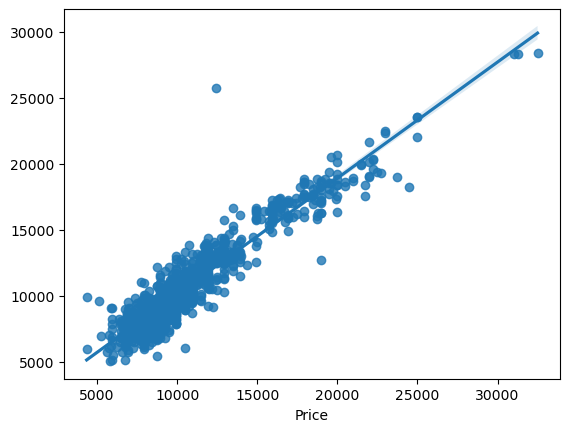

In [29]:
#training accuracy plots
sns.regplot(y_train,trainprdct)

<AxesSubplot:xlabel='Price'>

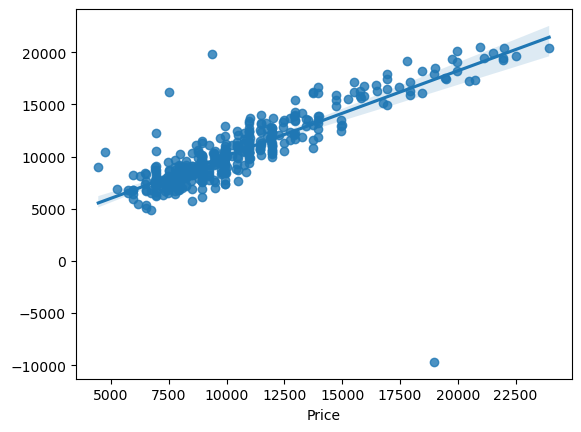

In [30]:
#testing accuracy
sns.regplot(y_test,yprdct)

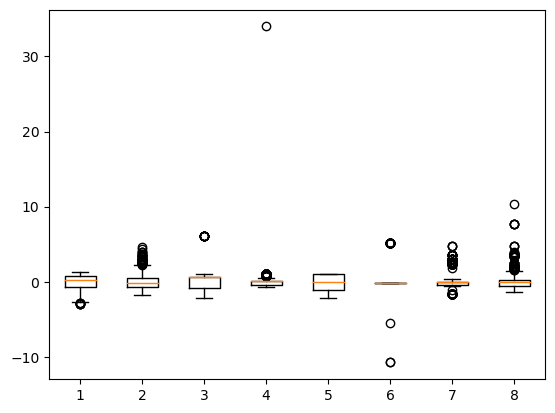

In [31]:
#ploting the box plot to visulize the outliers presented in all the variables
plt.boxplot(x);

# Lets improve Accuracy of the model by treating outliers

In [32]:
#here i am droping the outlier using IQR method for required variables

'''here i have written code multiple times its not necessary to write,
we can define the function and call the function when ever requred'''


Q1=np.percentile(carprice_df['KM'],25,interpolation='midpoint')#25% of data 
Q3=np.percentile(carprice_df['KM'],75,interpolation='midpoint')#75% of data

#inner qurtile range
IQR=Q3-Q1

#lower qurtile range
lower=Q1-1.5*IQR

#upper qurtile range
upper=Q3+1.5*IQR
lower,upper

#here i am droping outlier lies in upper and lower qurtile['KM']
new_df=carprice_df[(carprice_df.KM>lower)&(carprice_df.KM<upper)]#droping the outlier in KM feature

Q1=np.percentile(carprice_df['cc'],25,interpolation='midpoint')
Q3=np.percentile(carprice_df['cc'],75,interpolation='midpoint')
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower,upper

new_df=new_df[(new_df.cc>lower)&(new_df.cc<upper)]

Q1=np.percentile(carprice_df['Weight'],25,interpolation='midpoint')
Q3=np.percentile(carprice_df['Weight'],75,interpolation='midpoint')
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower,upper

new_df=new_df[(new_df.Weight>lower)&(new_df.Weight<upper)]

Q1=np.percentile(carprice_df['Quarterly_Tax'],25,interpolation='midpoint')
Q3=np.percentile(carprice_df['Quarterly_Tax'],75,interpolation='midpoint')
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower,upper

new_df=new_df[(new_df.Quarterly_Tax>lower)&(new_df.Quarterly_Tax<upper)]

#creating new dataframe by droping all outliers
#i could treat the values but i felt to drop it
new_df



,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
17,18,17950,24,9,2002,21716,Petrol,110,1,Blue,0,1600,3,4,5,85,1105
19,20,16950,30,3,2002,64359,Petrol,110,1,Grey,0,1600,3,4,5,85,1105
20,21,15950,30,3,2002,67660,Petrol,110,1,Blue,0,1600,3,4,5,85,1105
22,23,15950,28,5,2002,56349,Petrol,110,1,Black,0,1600,3,4,5,85,1120
23,24,16950,28,5,2002,32220,Petrol,110,1,Black,0,1600,3,4,5,85,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1437,8450,80,1,1998,23000,Petrol,86,0,Blue,0,1300,3,4,5,69,1015
1431,1438,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025
1432,1439,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015
1433,1440,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015


carprice_df['KM']=carprice_df['KM'][~((carprice_df['KM']<(Q1-1.5*IQR))|(carprice_df["KM"]>(Q3+1.5*IQR)))]

In [33]:
#repeating the steps by spliting the variables 
y=new_df.iloc[:,1]
x=new_df.iloc[:,[2,5,7,11,12,14,15,16]]
x=StandardScaler().fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#creating the new model my using the new train datasets
model=LinearRegression().fit(X_train,y_train)

#predicting the test values and accuracy of the model
ypred=model.predict(X_test)
print('Test Accuracy',r2_score(y_test,ypred))

#predicting the train values and accuracy of the model
ypred_train=model.predict(X_train)
print('Training Accuracy',r2_score(y_train,ypred_train))

Test Accuracy 0.8710871156568181
Training Accuracy 0.8773443802253585


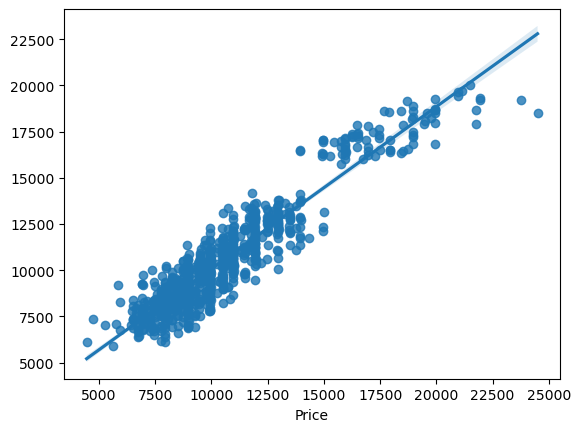

In [34]:
#Trained regression plot

sns.regplot(y_train,ypred_train);

<AxesSubplot:xlabel='Price'>

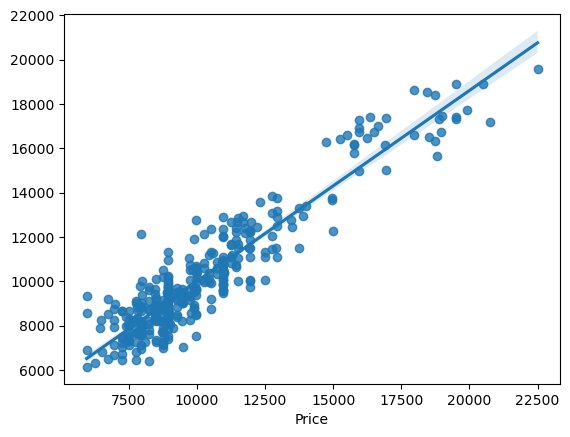

In [35]:
#reg plot for predicted values
sns.regplot(y_test,ypred)

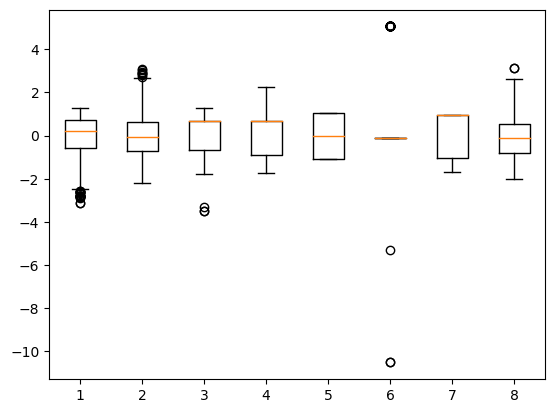

In [36]:
#Box plot after droping the outliers for selected feature
#here u can find some outliers present in this data i have not treated
#distribution of most of variables are not proper
plt.boxplot(x);